## Gradient Descent
Gradient Descent is the **most important algorithm in Machine Learning**!

GD is usd to fit the parameters of a model. More technically, GD finds the minimum of a function in a parameter space.

In Gradient Descent, the location in the parameter space is modified according to the gradient of the loss function times the learning rate.

The learning rate is a number that influences how far the algorithm moves along the gradient.

<img src="Gradient_Descent.png" width="600" height="1000" />

| <p style="font-size: 17px">Concept</p>      | <p style="font-size: 17px">Description</p> |
| ----------- | ----------- |
| <p style="font-size: 17px">Gradient Descent</p>      | <p style="font-size: 17px">iterative algorithm to find optimal parameters`</p>       |
| <p style="font-size: 17px">Gradient</p>      | <p style="font-size: 17px">partial differential over all features</p>       
| <p style="font-size: 17px">Loss function</p>      | <p style="font-size: 17px">the function that is optimized</p>
| <p style="font-size: 17px">Learning rate</p>      | <p style="font-size: 17px">factor that determines the size of steps/p>      
| <p style="font-size: 17px">Stochastic Gradient Descent</p>      | <p style="font-size: 17px">variant using randomly selected points</p>      
| <p style="font-size: 17px">Mini-Batch Gradient Descent</p>      | <p style="font-size: 17px">variant using random samples of points</p>      


### What is a gradient?

The Gradient is the slope of a function in multiple dimensions. Technically, the gradient of a function *f(x)* is a vector contaning all its partial derivatives at the point *x*.

### What is a loss function?

The minimized function is called loss function. It depends on the optimization problem, typically:
- **MSE** in linear regression
- **log-loss** in binary classification
- **crossentropy** in multinomial classification
- **hinge loss** in SVMs

Many applications (especially in Deep Learning) use their own, custom loss functions.

### Why is scaling features important?
> Gradient Descent will take longer if features are not on a similar scale.
**Andre Ng's rule of thumb** says that if the features range from -3 to 3 it is OK.

### Stochastic Gradient Descent

When you have lots of data, the standard GD alogorithm using all data points at every step becomes slow. There are two similar solutions:
- **Stochastic Gradient (SGD)** uses only randomly chosen data points at a time.
- **Batch Gradient Descent** uses randomly chosen subsets. This is the default when training neural networks.

# Building A Simple Version of Gradient Descent From Scratch:
- http://krspiced.pythonanywhere.com/chapters/project_bicycles/gradient_descent/README.html

### Let's start with some data.
Dummy dataset that will help illustrate what we are trying to accomplish.

$\hat{y} = -1.5 + 2.0$

Text(0.5, 1.0, 'y = 2x - 1.5')

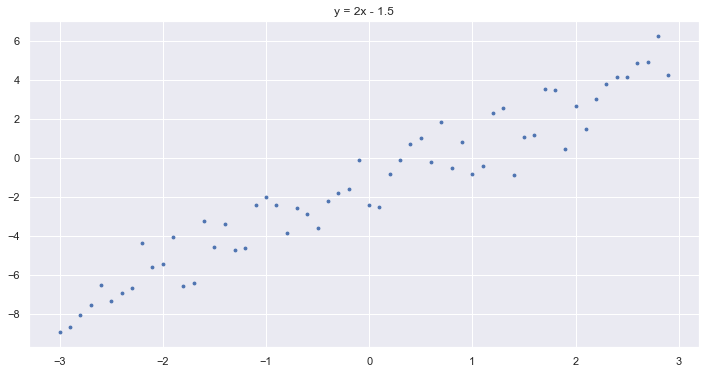

In [36]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

x = list(np.arange(-3, 3, 0.1).round(2))
# use np.random.normal to create randomly distributed x values.
# then calculate ytrue using a bias/intercept of -1.5 and a slope of 2.0. 
# add some random noise with the np.random.normal
y = [-1.5 + 2*x_val + np.random.normal(0, 1) for x_val in x]

plt.figure(figsize=(12,6))
plt.scatter(x, y, s=8.0)
plt.title('y = 2x - 1.5')

In a nutshell, the way the gradient descent algorithm works is that it tries to tweak/ optimize the parameters of a function (e.g. a machine learning model) in such a way that the error between the output of that function (i.e. ypred) and the actual values (i.e. ytrue) is **minimized**.

In this simple example, we are going to assume a **linear function** (y = b + wx) to approximate our data set, which means we have **2 parameters** we can tweak:

1. the slope/weight (w)
2. and the y-intecept/bias (b)

To start, write a python function called `make_line` that accepts 3 arguments - x data (list), slope (float), intercept (float) - and returns a list of "predicted" y-values based on those parameters.

### Let's give ourselves the ability to make a line, i.e. "prediction"

In [37]:
def make_line(x:list, slope, intercept):
    #slope = w1
    #intercept = w0
    ypred = [slope*x_val + intercept for x_val in x]  # calculate the predicted values
    return ypred

### Let's start with an (intentionally) bad prediction

In [41]:
bad_first_guess = make_line(x, -3, 2)

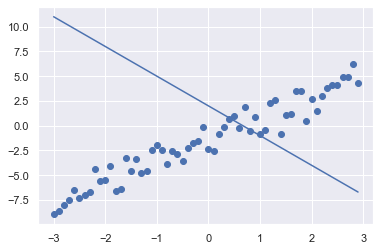

In [42]:
plt.scatter(x, y)
plt.plot(x, bad_first_guess)

Of course the paraemeters we gave were bad! But that's okay - we have to start from somewhere! And it shouldn't matter too much how bad our intial prediction was, because it's going to be the algorithm's job to find the best parameters.

We (as humans) can intuitively/ visually tell that the paraemters w = -3.0 and b = -2.0 gave us a bad prediction/ line of best fit.

But how can a computer tell that it's bad?

We need a wat of quantifying the error (or loss) between the predicted and the acutal values. In Machine Learning, this is referred to as a **loss function**.

There are many loss functions that we could use, but for this simple example, let's use a common one: `mean-squared-error`.

$$
MSE = \frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2
$$

### We need a loss function to tell us how bad the line is!
Write a python function called `mse` that encodes the equation above - accepting ytrue and ypred as arguments (both lists) - and returns a single value for the mean-squared-error. 

In [8]:
def mse(ytrue:list, ypred:list):
    
#     sr_list = []
#     for yt, yp in zip(ytrue, ypred):
#         squared_res = (yt - yp)**2
#         sr_list.append(squared_res)
    
    squared_residuals = [(yt - yp)**2 for yt, yp in zip(ytrue, ypred)]
    error = np.mean(squared_residuals)
    return error

In [43]:
# letters = ['a', 'b', 'c', 'd']
# numbers = [1, 2, 3, 4]

In [46]:
# for a, b in zip(letters, numbers):
#     print(a, b)

In [47]:
mse(y, bad_first_guess)

94.09561798073106

In [56]:
mse(y, make_line(x, 9, 9))

242.31549602634067

So at this point, we have the ability to tell our computer how "good" or "bad" a prediction (i.e. combination of parameters) is.
But this is not enough; we would also like to tell it how we should improve:
- Think of the ["Topfschlagen" analogy](http://8w2culturalfoodfestivalrecipes.weebly.com/uploads/4/8/3/5/48353919/6026286_orig.png):
    - we want to "guide" our model in the right direction, in such a way that it gets closer and closer to the "target" (i.e. the minimum error) each step it takes. In other words, we don't want it to try out a whole bunch of values or guess randomly.
    - We need to give it positive or negative feedback in the right direction each step it takes.

---

### Introducing, the **Gradient...**

The essence of gradient descent is - *after determining the error between the predicted values and the actual values* - deciding by how much to tweak each of the parameters in such a way that the new values for the parameters result in a smaller loss than before! So for each one of our parameters ($\omega$), we need to calculate:

$\omega_{new} = \omega_{old} + \triangle\omega$

... that makes our error smaller (i. e. makes our function more accurate) than the iteration before!

How do we calculate an appropriate change for each parameter ($\omega$) that achieves this objective? Wel,, as seen in a few of the images in the material above, the delta part of the equation evaluates to:

$\triangle \omega = -\eta \triangledown loss(\omega)$

The toughest part about implementing the algorithm is understanding what the $\triangledown  loss (\omega)$ part means. This term represents the **gradient of the loss function for each variable, $(\omega)$**. Another way of saying this is **calculating the first-order partial derivatives of the loss function with respect to each of the parameters**. And since we ware dealing with 2 parameters in this example (slope and intercept), we need to calculate 2 partial derivatives each time we run an iteration of the algorithm.

Write a python function called `calc_gradient` that takes in 4 arguments - (1) *the x data*, (2) *ytrue*, (3) *a slope/weight value*, (4) *an intercept/bias value* - calculates the numerical part derivative for each parameter based on a small incremental change d$\omega$, and then returns 2 partial derivates.

The collection of resulting partial derivatives (which we return as a list) is known as the gradient.

In [57]:

def calc_gradient(x, ytrue, slope, intercept):
    
    dw = 0.0001 #a very small change in our parameter, w
    ypred = make_line(x, slope, intercept)

    '''tweak first parameter'''
    slope_change = slope + dw
    # calculate predictions using intercept and slope_change
    ypred_slope = make_line(x, slope_change, intercept) #we ONLY tweak the slope (first parameter here)
    deriv_slope = (mse(ytrue, ypred_slope) - mse(ytrue, ypred)) / dw 

    '''tweak second parameter'''
    intercept_change = intercept + dw
    # calculate predictions using intercept_change and slope
    ypred_intercept = make_line(x, slope, intercept_change) #we ONLY tweak the intecept (second parameter)
    deriv_intercept = (mse(ytrue, ypred_intercept) - mse(ytrue, ypred)) / dw

    return [ deriv_slope, deriv_intercept ] # return both derivatives / gradients as a list

In [62]:
calc_gradient(x, y, -3, 2)

[-31.296848035822222, 7.278050924810486]

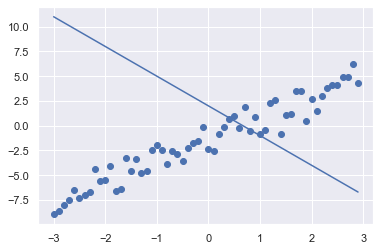

In [63]:
plt.scatter(x, y)
plt.plot(x, bad_first_guess)

---

### Let's run the algorithm! Start with some constants:

In [65]:
import time

In [74]:
SLOPE = -10000.0 # arbitrary starting value
INTERCEPT = 500000.0 # arbitrary starting value
LR = 0.1 # choose a small learning rate
MAX_ITER = 500

In [75]:
for i in range(MAX_ITER):
    
    time.sleep(0.1)
    
    #1. In each iteration of the loop, calculate the gradient of your loss function with respect to each model parameter.
    
    deriv_slope, deriv_intercept = calc_gradient(x, y, SLOPE, INTERCEPT)

    #2. For each model parameter, multiply the corresponding partial derivative by the learning rate, then negate it.
    #3. Add the resulting product to the previous value of the model parameter to get the updated parameter value.
    
    SLOPE_NEW = -LR*deriv_slope + SLOPE
    INTERCEPT_NEW = -LR*deriv_intercept + INTERCEPT

    #4. Overwrite the values of each parameter with its updated value.
    
    SLOPE = SLOPE_NEW
    INTERCEPT = INTERCEPT_NEW
    
    if i % 10 == 0:
    
        print(SLOPE, INTERCEPT)


1004.669189453125 399899.71923828125
1075.890064239502 43047.739028930664
117.90827661752701 4635.424628853798
14.624477946199477 498.04782518185675
3.4998000755877 52.412173600714596
2.30156425062944 4.412887108621533
2.1725026182883855 -0.7571020851055987
2.1586014273888843 -1.3139601181451077
2.157104134157928 -1.3739391349949504
2.1569428611396546 -1.3803994574612677
2.156925490469641 -1.3810952969159906
2.1569236194796115 -1.3811702455821528
2.156923417956591 -1.3811783182806625
2.1569233962503986 -1.3811791877880175
2.156923393912491 -1.3811792814428792
2.1569233936609145 -1.3811792915301435


KeyboardInterrupt: 

In [76]:
mse(y, make_line(x, 2.1569233936609145, -1.3811792915301435))

1.0924867317080393